# Taller 24 de agosto 2020

#### Un pequeño recuerdo del lunes 17 de agosto!

In [1]:
## usamos pandas para leer .csv

import pandas as pd 

In [2]:
## leemos los datos de rasgos 

datos_lenguas = pd.read_csv('TablaDominios.csv',sep=';')

In [3]:
datos_lenguas

## miren columnas y filas (una matriz!!!) ¿Qué ideas nos da la forma que tienen los datos? Pensemos en las estructura que
## ya conocemos!!! diccionarios, listas, if, for, ...

,Correlativo,Dominio,Lengua,TipoRasgo,ValorRasgo
0,1,2,1,1,6
1,2,2,2,1,6
2,3,2,4,1,6
3,4,2,5,1,6
4,5,2,7,1,6
...,...,...,...,...,...
407,460,4,45,3,1
408,461,4,45,4,2
409,458,4,45,1,6
410,141,4,46,2,1


In [4]:
## leemos las lenguas

lenguas_areas = pd.read_csv('LenguasAndinas.csv',sep='\t')

In [5]:
lenguas_areas

,Correlativo,Nombre Lengua,Región Lengua,País,Coordenadas Geográficas
0,1,Mapudungun,Andes Sur,Chile,-
1,2,Quechua Ancash,Quechua I,Varios,-
2,3,Quechua de Cajamarca,Quechua IIA,Perú,-
3,4,Quechua Ecuatoriano,Quechua IIB,Ecuador,-
4,5,Quechua Ayacuchano,Quechua IIC,Perú,-
...,...,...,...,...,...
68,69,Xavante karaja,Amazonía,Brasil,-
69,70,Bora,Amazonía,Perú y Colombia,-
70,71,Sabané,Amazonía,Brasil,-
71,72,aguarana wampis,Amazonía,Perú,-


#### Ordenamos los datos: en esto, hay muchas muchas opciones. Una podría ser usar "pandas". Sin embargo, para saber usar pandas es necesario (idealmente) saber usar algunas cosas básicas de Python. Es un círculo en que (según mi impresión) es mejor aprender un poco de **Python** primero. 

In [6]:
## primero, miremos los nombres de las lenguas

lenguas_areas = lenguas_areas[['Correlativo','Nombre Lengua','Región Lengua']]

In [7]:
lenguas_areas

,Correlativo,Nombre Lengua,Región Lengua
0,1,Mapudungun,Andes Sur
1,2,Quechua Ancash,Quechua I
2,3,Quechua de Cajamarca,Quechua IIA
3,4,Quechua Ecuatoriano,Quechua IIB
4,5,Quechua Ayacuchano,Quechua IIC
...,...,...,...
68,69,Xavante karaja,Amazonía
69,70,Bora,Amazonía
70,71,Sabané,Amazonía
71,72,aguarana wampis,Amazonía


In [8]:
## construyamos un diccionario numero:nombre lengua

numero = [num for num in lenguas_areas['Correlativo']]
nombre = [area for area in lenguas_areas['Nombre Lengua']]

In [9]:
## juntemos las dos listas

numero_nombre = [[numero[i],nombre[i]] for i in range(len(numero))]

In [10]:
## transformemos esto en diccionario

numero_nombre = {item[0]:item[1] for item in numero_nombre}

In [11]:
numero_nombre[1]

'Mapudungun'

In [12]:
## miremos ahora los dominios de los datos

dominios = []

## extraemos la columna
columna_dom = [dom for dom in datos_lenguas['Dominio']]

## recorremos la columna y agregamos solo los datos que no tenemos
for dom in columna_dom:
    if dom not in dominios:
        dominios = dominios + [dom]

In [13]:
dominios

[2, 3, 4]

#### Miremos el dominio "estructura argumental"

In [14]:
## filtramos por dominio 4 (estructura argumental)

dominio_negacion = datos_lenguas[datos_lenguas['Dominio']==4]

dominio_negacion = datos_lenguas[['Lengua','TipoRasgo','ValorRasgo']]

In [15]:
dominio_negacion

,Lengua,TipoRasgo,ValorRasgo
0,1,1,6
1,2,1,6
2,4,1,6
3,5,1,6
4,7,1,6
...,...,...,...
407,45,3,1
408,45,4,2
409,45,1,6
410,46,2,1


In [16]:
## lenguas que tienen información de EA

datos_lenguas_neg = [lengua for lengua in dominio_negacion['Lengua']]

In [17]:
lenguas = []

for lengua in datos_lenguas_neg:
    if lengua not in lenguas:
        lenguas = lenguas + [lengua]

In [18]:
## diccionario donde guardamos los datos

D_negacion = {lengua:{} for lengua in lenguas}

##### usemos loc en pandas :) [link útil](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) [otro link útil](https://www.w3resource.com/pandas/dataframe/dataframe-loc.php)

In [19]:
## miremos una mini base de datos en pandas

df = pd.DataFrame([[2, 3], [5, 6], [8, 9]],
     index=[1, 2, 3],
     columns=['altura', 'peso'])

In [20]:
df

,altura,peso
1,2,3
2,5,6
3,8,9


In [21]:
## algunos simples ejercicios
## altura del primer individuo

df.loc[1,'altura']

2

In [22]:
## individuos que tengan altura mayor a 4

df.loc[df['altura']>4]

,altura,peso
2,5,6
3,8,9


In [23]:
## en este ciclo for recorremos los datos con el índice "i". Fíjense que D_negación fue definido como
## un diccionario de lenguas, donde cada value es otro diccionario que guarda los tipos de rasgos
## y sus valores. 


for i in dominio_negacion.index:
    D_negacion[dominio_negacion.loc[i,'Lengua']][dominio_negacion.loc[i,'TipoRasgo']]=dominio_negacion.loc[i,'ValorRasgo']

In [24]:
D_negacion

{1: {1: 2, 2: 4, 3: 1, 4: 2, 5: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1},
 2: {1: 2, 2: 4, 3: 1, 4: 2, 7: 1, 8: 1, 9: 3, 11: 4},
 4: {1: 6, 3: 1, 7: 1, 9: 3, 10: 2},
 5: {1: 6, 2: 8, 3: 1, 5: 1, 7: 1, 8: 1, 9: 3, 4: 2},
 7: {1: 6, 3: 2, 4: 1, 5: 1, 8: 1, 9: 3, 11: 4, 2: 8},
 8: {1: 6, 3: 2, 4: 2, 5: 1, 8: 1, 9: 1, 11: 4, 2: 8},
 9: {1: 1, 3: 1, 4: 1, 8: 1, 9: 4, 2: 1},
 10: {1: 1, 3: 1, 7: 1, 8: 1, 9: 4, 10: 1, 11: 2, 2: 1, 4: 0},
 11: {1: 2, 3: 1, 4: 4, 8: 2, 9: 2, 10: 1, 11: 2, 2: 4},
 12: {1: 1, 3: 2, 4: 3, 7: 1, 8: 5, 9: 4, 10: 1, 11: 4, 2: 1},
 17: {1: 1, 3: 1, 4: 1, 7: 2, 8: 2, 10: 1, 11: 3},
 19: {1: 2},
 20: {1: 2},
 21: {1: 2, 3: 1, 4: 2, 7: 2, 8: 2, 9: 2, 10: 1, 11: 2, 2: 3},
 22: {1: 4},
 23: {1: 3, 3: 1, 4: 2, 7: 2, 8: 2, 9: 4, 10: 1, 11: 5},
 25: {1: 1, 3: 1, 7: 2, 8: 2, 9: 4, 10: 1, 11: 3, 2: 1},
 26: {1: 2, 5: 1, 7: 2, 8: 2, 9: 4, 10: 1, 11: 2, 2: 4},
 27: {1: 1, 3: 3, 7: 1, 8: 3, 9: 4, 10: 1, 11: 5, 2: 2},
 28: {1: 4, 7: 2, 8: 2, 9: 2, 10: 3, 11: 2},
 29: {1: 3, 3: 1, 7: 1, 8

#### Ahora lo nuevo del día 24 de agosto!!!

In [25]:
## juntemos todo en una sola función :)

def read_lenguas_andinas(file, names, dominio_num):
    
    ## leemos los datos
    ## rasgos!
    datos_lenguas = pd.read_csv(file,sep=';')
    ## nombre lenguas!
    lenguas_areas = pd.read_csv(names,sep='\t')
    lenguas_areas = lenguas_areas[['Correlativo','Nombre Lengua']]
    ## creamos un diccionario numero:nombre
    numero = [num for num in lenguas_areas['Correlativo']]
    nombre = [area for area in lenguas_areas['Nombre Lengua']]
    numero_nombre = [[numero[i],nombre[i]] for i in range(len(numero))]
    numero_nombre = {item[0]:item[1] for item in numero_nombre}
    ## ahora filtramos por dominio (no es estrictamente necesario, igual prefiero hacerlo)
    dominio = datos_lenguas[datos_lenguas['Dominio']==dominio_num]
    ## lenguas con anotación en este dominio
    datos_lenguas = [lengua for lengua in dominio['Lengua']]
    lenguas = []
    
    ## valores únicos de lenguas
    for lengua in datos_lenguas:
        if lengua not in lenguas:
            lenguas = lenguas + [lengua]
    
    ## diccionario para guardar los datos
    D = {lengua:{} for lengua in lenguas}
    
    ## recorremos usando loc :)
    for i in list(dominio.index):
        D[dominio.loc[i,'Lengua']][dominio.loc[i,'TipoRasgo']]=dominio.loc[i,'ValorRasgo']
    
    return {numero_nombre[key]:D[key] for key in D.keys()} ## diccionario!

In [26]:
read_lenguas_andinas('TablaDominios.csv','LenguasAndinas.csv',3)

{'Mapudungun': {2: 1, 3: 1, 4: 2, 5: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1},
 'Quechua Ancash': {2: 1, 3: 1, 4: 2, 7: 1, 8: 1, 9: 3, 11: 4},
 'Quechua de Cajamarca': {2: 1, 3: 1, 4: 2, 5: 1, 7: 1, 8: 1, 9: 3, 10: 2},
 'Quechua Ecuatoriano': {3: 1, 7: 1, 9: 3, 10: 2},
 'Quechua Ayacuchano': {2: 1, 3: 1, 5: 1, 7: 1, 8: 1, 9: 3},
 'Aymara Sureño': {3: 1, 4: 2, 5: 1, 8: 1, 9: 3, 11: 4},
 'Jaqaru': {3: 1, 4: 2, 5: 1, 8: 1, 9: 1, 11: 4},
 'Chipaya': {3: 1, 4: 2, 8: 1, 9: 4},
 'Uchumataqu': {3: 1, 7: 1, 8: 1, 9: 4, 10: 1, 11: 2},
 'Cholón': {3: 1, 4: 2, 8: 2, 9: 2, 10: 1, 11: 2},
 'Mochica': {3: 2, 4: 3, 7: 1, 8: 5, 9: 4, 10: 1, 11: 4},
 'Kunza': {3: 1, 7: 2, 8: 2, 9: 4},
 'Millcayac': {3: 1, 4: 2, 7: 1, 8: 1, 9: 4, 10: 1, 11: 2},
 'Allentiac': {1: 3, 3: 1, 4: 2, 7: 1, 8: 1, 9: 4, 10: 1, 11: 4},
 'Selknam': {3: 1, 4: 3, 7: 2, 8: 2, 9: 4, 10: 1},
 'Yagan': {3: 1, 4: 1, 7: 2, 8: 2, 10: 1, 11: 3},
 'Pilagá': {3: 1, 4: 2, 7: 2, 8: 2, 9: 2, 10: 1, 11: 2},
 'Wichí': {3: 1, 4: 2, 7: 2, 8: 2, 9: 4, 10: 1

In [27]:
## guardemos como csv los datos :)

def lenguas_andinas_dominio_csv(file,names,dom):
    return pd.DataFrame.from_dict(read_lenguas_andinas(file,names,dom)).to_csv('dominio_'+str(dom)+'.csv')

In [31]:
lenguas_andinas_dominio_csv('TablaDominios.csv','LenguasAndinas.csv',3)

In [32]:
dominio_3 = pd.read_csv('dominio_3.csv',sep=',').rename(columns={'Unnamed: 0': 'rasgos'})

In [33]:
dominio_3

,rasgos,Mapudungun,Quechua Ancash,Quechua de Cajamarca,Quechua Ecuatoriano,Quechua Ayacuchano,Aymara Sureño,Jaqaru,Chipaya,Uchumataqu,...,Sanuma,Hup,kulina,bora,Baure,Yurakare,Movima,Harakmbut,Sabané,aguarana wampis
0,2,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0
1,3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,1.0,3.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0
2,4,2.0,2.0,2.0,NaN,NaN,2.0,2.0,2.0,NaN,...,NaN,NaN,NaN,NaN,3.0,NaN,NaN,2.0,NaN,NaN
3,5,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,...,1.0,NaN,2.0,5.0,4.0,1.0,4.0,2.0,NaN,1.0
5,8,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,...,6.0,3.0,3.0,6.0,NaN,1.0,5.0,1.0,2.0,1.0
6,9,1.0,3.0,3.0,3.0,3.0,3.0,1.0,4.0,4.0,...,4.0,5.0,4.0,3.0,4.0,2.0,5.0,3.0,NaN,5.0
7,10,1.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,1.0,...,1.0,4.0,1.0,NaN,1.0,1.0,1.0,2.0,NaN,4.0
8,11,1.0,4.0,NaN,NaN,NaN,4.0,4.0,NaN,2.0,...,4.0,3.0,4.0,4.0,3.0,2.0,5.0,4.0,NaN,3.0
9,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### D. Distancias entre lenguas

In [34]:
## miremos el dominio 3 (estructura argumental)

dom_estructura_argumental = read_lenguas_andinas('TablaDominios.csv','LenguasAndinas.csv',3)

In [35]:
## extraemos los diccionarios asociados a las lenguas

diccionarios = list(dom_estructura_argumental.values())

In [36]:
diccionarios

[{2: 1, 3: 1, 4: 2, 5: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1},
 {2: 1, 3: 1, 4: 2, 7: 1, 8: 1, 9: 3, 11: 4},
 {2: 1, 3: 1, 4: 2, 5: 1, 7: 1, 8: 1, 9: 3, 10: 2},
 {3: 1, 7: 1, 9: 3, 10: 2},
 {2: 1, 3: 1, 5: 1, 7: 1, 8: 1, 9: 3},
 {3: 1, 4: 2, 5: 1, 8: 1, 9: 3, 11: 4},
 {3: 1, 4: 2, 5: 1, 8: 1, 9: 1, 11: 4},
 {3: 1, 4: 2, 8: 1, 9: 4},
 {3: 1, 7: 1, 8: 1, 9: 4, 10: 1, 11: 2},
 {3: 1, 4: 2, 8: 2, 9: 2, 10: 1, 11: 2},
 {3: 2, 4: 3, 7: 1, 8: 5, 9: 4, 10: 1, 11: 4},
 {3: 1, 7: 2, 8: 2, 9: 4},
 {3: 1, 4: 2, 7: 1, 8: 1, 9: 4, 10: 1, 11: 2},
 {1: 3, 3: 1, 4: 2, 7: 1, 8: 1, 9: 4, 10: 1, 11: 4},
 {3: 1, 4: 3, 7: 2, 8: 2, 9: 4, 10: 1},
 {3: 1, 4: 1, 7: 2, 8: 2, 10: 1, 11: 3},
 {3: 1, 4: 2, 7: 2, 8: 2, 9: 2, 10: 1, 11: 2},
 {3: 1, 4: 2, 7: 2, 8: 2, 9: 4, 10: 1, 11: 5},
 {3: 1, 7: 2, 8: 2, 9: 4, 10: 1, 11: 3},
 {5: 1, 7: 2, 8: 2, 9: 4, 10: 1, 11: 2},
 {3: 3, 7: 1, 8: 3, 9: 4, 10: 1, 11: 5},
 {7: 2, 8: 2, 9: 2, 10: 3, 11: 2},
 {3: 1, 7: 1, 8: 1, 9: 5, 10: 4, 11: 3},
 {8: 1},
 {3: 2, 8: 6, 9: 3, 10: 2, 11:

In [37]:
## nos quedamos con los keys de los diccionarios de largo mayor a 6

rasgos_comunes = [list(item.keys()) for item in diccionarios if len(item)>6]

In [38]:
rasgos_comunes

[[2, 3, 4, 5, 7, 8, 9, 10, 11],
 [2, 3, 4, 7, 8, 9, 11],
 [2, 3, 4, 5, 7, 8, 9, 10],
 [3, 4, 7, 8, 9, 10, 11],
 [3, 4, 7, 8, 9, 10, 11],
 [1, 3, 4, 7, 8, 9, 10, 11],
 [3, 4, 7, 8, 9, 10, 11],
 [3, 4, 7, 8, 9, 10, 11],
 [3, 5, 7, 8, 9, 10, 11],
 [3, 4, 7, 8, 9, 10, 11],
 [2, 3, 7, 8, 9, 10, 11]]

In [39]:
## intersectamos todos los rasgos: manera poco transparente de hacer esto 

rasgos_comunes = set(rasgos_comunes[0]).intersection(*rasgos_comunes)

In [40]:
rasgos_comunes

{3, 7, 8, 9}

In [41]:
## manera un poco más larga: código más largo NO implica código más lento!!!

## nos quedamos con los keys de los diccionarios de largo mayor a 6

rasgos_comunes = [list(item.keys()) for item in diccionarios if len(item)>6]

## definimos una lista de rasgos en común
rasgos_comunes_list = []
## tomamos los rasgos de L0 como iniciales
L0 = rasgos_comunes[0]

## recorremos cada rasgo de L0
for f in L0:
    ## la idea es que si f está en todos los elementos de rasgos_comunes[1:], entonces n tiene que ser igual a 
    ## len(rasgos_comunes[1:])
    n=0
    for L in rasgos_comunes[1:]:
        if f in L:
            n+=1
    ## condición afirmativa para incluir un rasgo!!!
    if n==len(rasgos_comunes[1:]):
        rasgos_comunes_list+=[f]

In [42]:
rasgos_comunes = set(rasgos_comunes_list)

In [43]:
rasgos_comunes

{3, 7, 8, 9}

In [44]:
## restringimos los diccionarios

diccionarios_restringidos = {lengua:{key:dom_estructura_argumental[lengua][key] for key in rasgos_comunes} for lengua in dom_estructura_argumental.keys() if len(dom_estructura_argumental[lengua])>6}

In [45]:
diccionarios_restringidos

{'Mapudungun': {8: 1, 9: 1, 3: 1, 7: 1},
 'Quechua Ancash': {8: 1, 9: 3, 3: 1, 7: 1},
 'Quechua de Cajamarca': {8: 1, 9: 3, 3: 1, 7: 1},
 'Mochica': {8: 5, 9: 4, 3: 2, 7: 1},
 'Millcayac': {8: 1, 9: 4, 3: 1, 7: 1},
 'Allentiac': {8: 1, 9: 4, 3: 1, 7: 1},
 'Pilagá': {8: 2, 9: 2, 3: 1, 7: 2},
 'Wichí': {8: 2, 9: 4, 3: 1, 7: 2},
 'Quechua de Yauyos Sur': {8: 1, 9: 3, 3: 1, 7: 1},
 'Harakmbut': {8: 1, 9: 3, 3: 1, 7: 2},
 'aguarana wampis': {8: 1, 9: 5, 3: 1, 7: 1}}

In [46]:
## extraemos solo los values, vectores de rasgos!!!

diccionarios_restringidos = {lengua:list(diccionarios_restringidos[lengua].values()) for lengua in diccionarios_restringidos.keys()}

In [47]:
diccionarios_restringidos

{'Mapudungun': [1, 1, 1, 1],
 'Quechua Ancash': [1, 3, 1, 1],
 'Quechua de Cajamarca': [1, 3, 1, 1],
 'Mochica': [5, 4, 2, 1],
 'Millcayac': [1, 4, 1, 1],
 'Allentiac': [1, 4, 1, 1],
 'Pilagá': [2, 2, 1, 2],
 'Wichí': [2, 4, 1, 2],
 'Quechua de Yauyos Sur': [1, 3, 1, 1],
 'Harakmbut': [1, 3, 1, 2],
 'aguarana wampis': [1, 5, 1, 1]}

In [48]:
## estandarizamos los datos

from sklearn import preprocessing

vectors_sta = preprocessing.scale(list(diccionarios_restringidos.values()))

In [49]:
vectors_sta

array([[-0.47140452, -2.15967106, -0.31622777, -0.61237244],
       [-0.47140452, -0.25916053, -0.31622777, -0.61237244],
       [-0.47140452, -0.25916053, -0.31622777, -0.61237244],
       [ 2.98556197,  0.69109474,  3.16227766, -0.61237244],
       [-0.47140452,  0.69109474, -0.31622777, -0.61237244],
       [-0.47140452,  0.69109474, -0.31622777, -0.61237244],
       [ 0.3928371 , -1.2094158 , -0.31622777,  1.63299316],
       [ 0.3928371 ,  0.69109474, -0.31622777,  1.63299316],
       [-0.47140452, -0.25916053, -0.31622777, -0.61237244],
       [-0.47140452, -0.25916053, -0.31622777,  1.63299316],
       [-0.47140452,  1.64135001, -0.31622777, -0.61237244]])

In [50]:
diccionarios_restringidos = dict(zip(diccionarios_restringidos.keys(),vectors_sta))

In [51]:
diccionarios_restringidos

{'Mapudungun': array([-0.47140452, -2.15967106, -0.31622777, -0.61237244]),
 'Quechua Ancash': array([-0.47140452, -0.25916053, -0.31622777, -0.61237244]),
 'Quechua de Cajamarca': array([-0.47140452, -0.25916053, -0.31622777, -0.61237244]),
 'Mochica': array([ 2.98556197,  0.69109474,  3.16227766, -0.61237244]),
 'Millcayac': array([-0.47140452,  0.69109474, -0.31622777, -0.61237244]),
 'Allentiac': array([-0.47140452,  0.69109474, -0.31622777, -0.61237244]),
 'Pilagá': array([ 0.3928371 , -1.2094158 , -0.31622777,  1.63299316]),
 'Wichí': array([ 0.3928371 ,  0.69109474, -0.31622777,  1.63299316]),
 'Quechua de Yauyos Sur': array([-0.47140452, -0.25916053, -0.31622777, -0.61237244]),
 'Harakmbut': array([-0.47140452, -0.25916053, -0.31622777,  1.63299316]),
 'aguarana wampis': array([-0.47140452,  1.64135001, -0.31622777, -0.61237244])}

In [52]:
## juntemos todo en una función que reciba un diccionario de rasgos y entregue diccionarios restringidos
## por rasgos en común :)
## D es el diccionario que entrega la función read_lenguas_andinas
from sklearn import preprocessing

def diccionario_rasgos_comunes(D,num_rasgos,estandarizar):
    
    ## extraemos los diccionarios de rasgos
    diccionarios = list(D.values())
    ## buscamos los rasgos en común
    rasgos_comunes = [list(item.keys()) for item in diccionarios if len(item)>num_rasgos]
    ## intersectamos todos los conjuntos de rasgos sujetos a la condición len(item)>num_rasgos
    rasgos_comunes = set(rasgos_comunes[0]).intersection(*rasgos_comunes)
    ## restringimos D
    diccionarios_restringidos = {lengua:{key:D[lengua][key] for key in rasgos_comunes} for lengua in D.keys() if len(D[lengua])>num_rasgos}
    ## nos quedamos solo con los values
    diccionarios_restringidos = {lengua:list(diccionarios_restringidos[lengua].values()) for lengua in diccionarios_restringidos.keys()}
    ## estandarizamos if estandarizar==True
    ## ponemos un try-except! dentro de "try" ponemos algo que queremos que se ejecute aunque entregue
    ## un error. Dentro de "except", ponemos una solución al error. En este caso, más rasgos!!!
    try:
        if estandarizar==True:
            vectors_sta = preprocessing.scale(list(diccionarios_restringidos.values()))
        else:
            return diccionarios_restringidos
    except ValueError:
        return print('incrementa el número de rasgos!!!')
    ## de la forma (un poco más) sofisticada
    diccionarios_restringidos = dict(zip(diccionarios_restringidos.keys(),vectors_sta))
    return diccionarios_restringidos

In [53]:
diccionario_rasgos_comunes(dom_estructura_argumental,6,False)

{'Mapudungun': [1, 1, 1, 1],
 'Quechua Ancash': [1, 3, 1, 1],
 'Quechua de Cajamarca': [1, 3, 1, 1],
 'Mochica': [5, 4, 2, 1],
 'Millcayac': [1, 4, 1, 1],
 'Allentiac': [1, 4, 1, 1],
 'Pilagá': [2, 2, 1, 2],
 'Wichí': [2, 4, 1, 2],
 'Quechua de Yauyos Sur': [1, 3, 1, 1],
 'Harakmbut': [1, 3, 1, 2],
 'aguarana wampis': [1, 5, 1, 1]}

In [54]:
## distancias!!!

from scipy import spatial

distances = {lengua:{lengualengua:spatial.distance.cosine(diccionarios_restringidos[lengua],diccionarios_restringidos[lengualengua]) for lengualengua in diccionarios_restringidos.keys()} for lengua in diccionarios_restringidos.keys()}

In [55]:
distances

{'Mapudungun': {'Mapudungun': 0.0,
  'Quechua Ancash': 0.3791119725783013,
  'Quechua de Cajamarca': 0.3791119725783013,
  'Mochica': 1.3424141041163087,
  'Millcayac': 1.3168923690360472,
  'Allentiac': 1.3168923690360472,
  'Pilagá': 0.6850721351968863,
  'Wichí': 1.6038749336110738,
  'Quechua de Yauyos Sur': 0.3791119725783013,
  'Harakmbut': 1.0291704465201388,
  'aguarana wampis': 1.6678097540693155},
 'Quechua Ancash': {'Mapudungun': 0.3791119725783013,
  'Quechua Ancash': 0.0,
  'Quechua de Cajamarca': 0.0,
  'Mochica': 1.5689463226328801,
  'Millcayac': 0.45325640143300594,
  'Allentiac': 0.45325640143300594,
  'Pilagá': 1.4216016951278718,
  'Wichí': 1.7844045610653032,
  'Quechua de Yauyos Sur': 0.0,
  'Harakmbut': 1.3995117439008495,
  'aguarana wampis': 0.831153770069728},
 'Quechua de Cajamarca': {'Mapudungun': 0.3791119725783013,
  'Quechua Ancash': 0.0,
  'Quechua de Cajamarca': 0.0,
  'Mochica': 1.5689463226328801,
  'Millcayac': 0.45325640143300594,
  'Allentiac': 0.4

In [56]:
## otra vez una función: distancias!!!
from scipy import spatial

def diccionario_distancias(D,num_rasgos,estandarizar,distancia):
    
    ## D es el diccionario que entrega la función read_lenguas_andinas
    ## usamos la función diccionario_rasgos_comunes
    diccionarios_restringidos = diccionario_rasgos_comunes(D,num_rasgos,estandarizar)
    ## calculamos las distancias :)
    ## https://docs.scipy.org/doc/scipy/reference/spatial.distance.html <-- más distancias!
    if distancia=='cosine':
        distances = {lengua:{lengualengua:spatial.distance.cosine(diccionarios_restringidos[lengua],diccionarios_restringidos[lengualengua]) for lengualengua in diccionarios_restringidos.keys()} for lengua in diccionarios_restringidos.keys()}
    if distancia=='hamming':
        distances = {lengua:{lengualengua:spatial.distance.hamming(diccionarios_restringidos[lengua],diccionarios_restringidos[lengualengua]) for lengualengua in diccionarios_restringidos.keys()} for lengua in diccionarios_restringidos.keys()}
    if distancia=='euclidean':
        distances = {lengua:{lengualengua:spatial.distance.euclidean(diccionarios_restringidos[lengua],diccionarios_restringidos[lengualengua]) for lengualengua in diccionarios_restringidos.keys()} for lengua in diccionarios_restringidos.keys()}
    return distances

In [57]:
D_distancias = diccionario_distancias(dom_estructura_argumental,6,True,'cosine')

In [58]:
D_distancias

{'Mapudungun': {'Mapudungun': 0.0,
  'Quechua Ancash': 0.3791119725783013,
  'Quechua de Cajamarca': 0.3791119725783013,
  'Mochica': 1.3424141041163087,
  'Millcayac': 1.3168923690360472,
  'Allentiac': 1.3168923690360472,
  'Pilagá': 0.6850721351968863,
  'Wichí': 1.6038749336110738,
  'Quechua de Yauyos Sur': 0.3791119725783013,
  'Harakmbut': 1.0291704465201388,
  'aguarana wampis': 1.6678097540693155},
 'Quechua Ancash': {'Mapudungun': 0.3791119725783013,
  'Quechua Ancash': 0.0,
  'Quechua de Cajamarca': 0.0,
  'Mochica': 1.5689463226328801,
  'Millcayac': 0.45325640143300594,
  'Allentiac': 0.45325640143300594,
  'Pilagá': 1.4216016951278718,
  'Wichí': 1.7844045610653032,
  'Quechua de Yauyos Sur': 0.0,
  'Harakmbut': 1.3995117439008495,
  'aguarana wampis': 0.831153770069728},
 'Quechua de Cajamarca': {'Mapudungun': 0.3791119725783013,
  'Quechua Ancash': 0.0,
  'Quechua de Cajamarca': 0.0,
  'Mochica': 1.5689463226328801,
  'Millcayac': 0.45325640143300594,
  'Allentiac': 0.4

In [59]:
## construyamos un heatmap :) https://seaborn.pydata.org/generated/seaborn.heatmap.html

import seaborn as sns
import matplotlib.pyplot as plt

def mapa_calor(D,num_rasgos,estandarizar,distancia):
    
    ## D es el diccionario que entrega la función read_lenguas_andinas
    D_distancias = diccionario_distancias(D,num_rasgos,estandarizar,distancia)

    plt.figure(figsize=(10,10))
    cg=sns.clustermap(D_distancias,cmap='OrRd',linewidth=1)
    plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
    plt.rcParams.update({'font.size': 15})
    plt.savefig('heatmap_'+str(num_rasgos)+str(estandarizar)+distancia+'.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/seaborn/matrix.py:595: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


<Figure size 720x720 with 0 Axes>

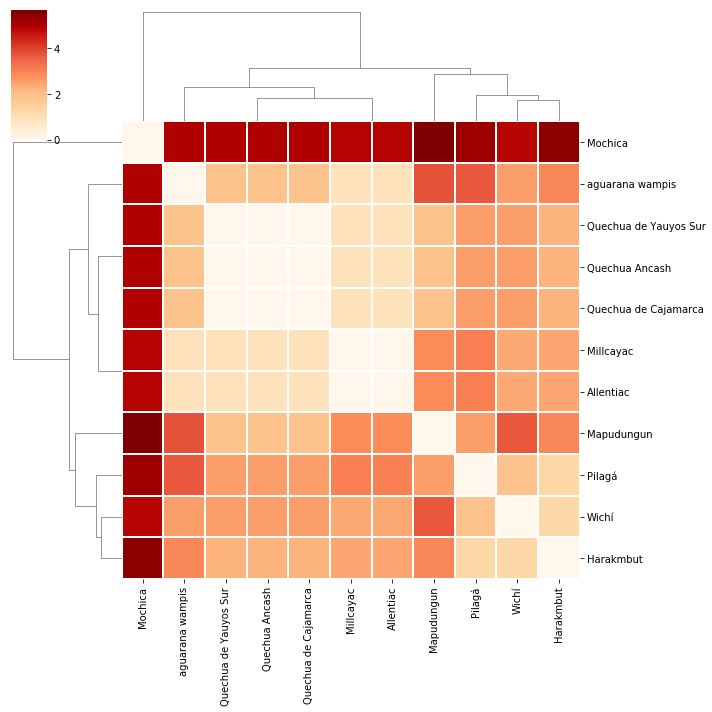

In [60]:
mapa_calor(dom_estructura_argumental,6,True,'euclidean')